# Improving edition of MTG with L-systems like primitives

## Initialization

In [1]:
%matplotlib inline
%gui qt
import pylab

QApplication: invalid style override 'kvantum' passed, ignoring it.
	Available styles: Windows, Fusion


The rewriting module adds L-systems capabilities on MTG.

In [2]:
from openalea.mtg.rewriting import *

## Modules declaration

Modules are declared using the 'module' function. It should specified the name of the module and the scale. Once declared, a new type exists that can be used to create the model.

**Limit** : For now, a third parameter that should be set to globals() has to be given.

In [3]:
module('Plant',     1, globals())
module('Internode', 2, globals())
module('Leaf',      2, globals())
module('LeafBud',   3, globals())
module('AxisBud',   3, globals())
module('ISegment',  3, globals())
module('LSegment',  3, globals())

##  Model declaration
A class deriving from MTGLsystem will contains all the rules of the model.
The axiom is specified with the function

    def axiom(self):
       produce ...
    
Rules are then specified with functions. Production rules are specified with the '@production' decorator. Interpretation rules with '@interpretation'.

### Productions
A production rule has the following syntax.
The predecessor is specified with the name of the function
To replace a A module for instance, it should be specified like this

    @production
    def A(node): ...

To specify the context of the rule, all the MTG primitive can be used (using the ProxyNode interface).
For instance to see if the node has a B as parent,

         if node.parent().match(B):

Finally to specify the successor, the nproduce and produce command of the node should be used.

             node.nproduce(C(length=2),D)
             node.nproduce([D])
             node.produce(node)

The normal bracket can be used to specify a branch. Alternativelly if the branch is specified with multiple nproduce
'[' and ']' or SB() and EB() can be used.

**Limits** : Two successive modules are specified with coma in between. Name of the modules should follow standart python variable convention. Short symbols (+-/\_ ...) cannot be used.

### Interpretation
The interpretation rules are based on the PlantGL turtle and have the following syntax

    @interpretation
    def D(node, turtle):
        turtle.down(60).F(5).setColor(2).quad(5)


**Limit** : 2 rules with the same predecessor cannot be written. Production and Interpretation of the same module cannot be in the same model.

**Advantage** : Model can derive from each other.

In [6]:
class MySimu(MTGLsystem):
    def __init__(self):
        MTGLsystem.__init__(self)

    # Axiom
    def axiom(self):
        return produce(Plant(), Internode(), ISegment(length=3), [ LeafBud()], AxisBud(age=0))

    # Production rules
    @production
    def AxisBud(self, node): 
        """ ISegment < AxisBud --> Internode ISegment [LeafBud] AxisBud """
        if node.parent().match(ISegment):      
            node.age += 1
            node.produce( Internode(),ISegment(length=3), [LeafBud()], node)

    @production
    def LeafBud(self, node): 
        """ ISegment < LeafBud --> [ Internode ISegment Leaf LSegment x5 ] """
        from math import sin, pi
        if node.parent().match(ISegment):      
            node.nproduce('[',Internode(), ISegment(length=2), Leaf())
            for i in range(5):
                node.nproduce(LSegment(radius = sin((i+1)*pi/6.5)))
            node.produce(']')

    # Interpretation rules
    @interpretation
    def ISegment(self, node, turtle):
        """ ISegment --> /(137) &(60) F(l) """
        turtle.rollL(137)
        if node.edge_type() == '+': turtle.down(60)
        turtle.F(node.length)

    @interpretation
    def Leaf(self, node, turtle):
        """ Leaf --> ,(2) | """
        turtle.setColor(2).rollToVert()

    @interpretation
    def LSegment(self, node, turtle):
        """ 
        LSegment(radius) > LSegment(topradius) --> &(10) _(radius) Quad(2,topradius) 
        LSegment(radius) --> &(10) _(radius) Quad(2,0) 

        """
        try:
            n = node.children()[0]
            topradius = n.radius
        except:
            topradius = 0
        turtle.down(10).setWidth(node.radius).quad(2, topradius)

## Simulation

The simulation object should be instancied. Functions 'run(nbstep)', 'animate(nbstep,dt)' can be used to launch the simulation. To plot a model, 'simu.plot()' can also be used. In this case, the geometry is computed and added to the MTG.

**Limit** : For now, the production are applied directly. Side effect can occur during the simulation.

In [11]:
simu = MySimu()
mtg = simu.animate(20)

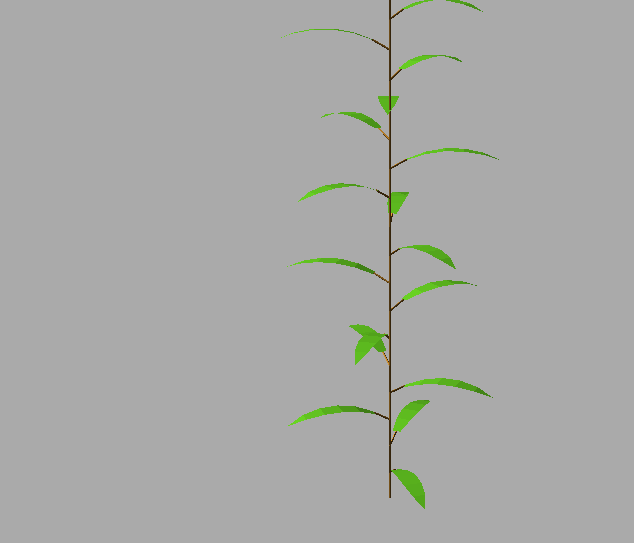

In [8]:
# display(PlantGL(simu.sceneInterpretation()))

from IPython.display import Image, display
import tempfile, os
from openalea.plantgl.all import Viewer
fn = tempfile.mktemp(suffix='.png')
Viewer.saveSnapshot(fn)
img = Image(fn)
os.unlink(fn)
display(img)

## The resulting MTG

In [10]:
print('Result:')
mtg.display(display_scale=True)

Result:
MTG : nb_vertices=206, nb_scales=4
/Plant			(id=1, scale=1)											
^/Internode			(id=2, scale=2)											
^/ISegment			(id=3, scale=3)											
	+Internode			(id=6, scale=2)										
	^/ISegment			(id=7, scale=3)										
	^<Leaf			(id=8, scale=2)										
	^/LSegment			(id=9, scale=3)										
	^<LSegment			(id=10, scale=3)										
	^<LSegment			(id=11, scale=3)										
	^<LSegment			(id=12, scale=3)										
	^<LSegment			(id=13, scale=3)										
^<Internode			(id=14, scale=2)											
^/ISegment			(id=15, scale=3)											
	+Internode			(id=18, scale=2)										
	^/ISegment			(id=19, scale=3)										
	^<Leaf			(id=20, scale=2)										
	^/LSegment			(id=21, scale=3)										
	^<LSegment			(id=22, scale=3)										
	^<LSegment			(id=23, scale=3)										
	^<LSegment			(id=24, scale=3)										
	^<LSegment			(id=25, scale=3)										
^<Internode			(id=26, scale=2)											
^/ISegment			(id=27, scale=3)											
	+Internode			(id=30, scale=2)